<a href="https://colab.research.google.com/github/stathj/verbose-umbrella/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

202084064 최현진
## 주제: 서울시 지역 특화 도서관 선정 및 지도 도식화 - 금천구, 관악구, 강북구를 중심으로
## 변경사항: 상권 데이터 제외
---

## 서울시 공공도서관(설립주체별)(구별) 통계 (https://data.seoul.go.kr/dataList/11064/S/2/datasetView.do)
### *'자료권수 도서'와 '도서관 방문자수' 칼럼을 중심으로 가장 적은 구 3개를 파악*
## 구별 장서/대출 데이터 (https://www.data4library.kr/openDataL)
### *3개 구의 각 장서.대출 데이터로 분석 진행*
---



### 금천구 (1)

In [33]:
import pandas as pd
import numpy as np

In [34]:
lib = './금천구립독산도서관 장서 대출목록 (2023년 04월).csv'

In [35]:
df1 = pd.read_csv(lib)
print(df1)

              번호                               도서명  \
0            1.0                     서울 洞의 역사 :구로구   
1            2.0                     서울 洞의 역사 :구로구   
2            3.0                     서울 洞의 역사 :구로구   
3            4.0                     서울 洞의 역사 :금천구   
4            5.0           (Usborne) 어린이를 위한 마음 처방   
...          ...                               ...   
144667  121980.0                            글쓰기 백신   
144668       NaN                               NaN   
144669  121981.0  한국 환경 운동의 사회학:정의롭고 지속가능한 사회를 위하여   
144670  121982.0                       정말,경찰을 부를까?   
144671  121983.0                              마요네즈   

                                          저자       출판사  발행년도             ISBN  \
0                                서울역사편찬원 [편]   서울역사편찬원  2020  9791160711103.0   
1                                서울역사편찬원 [편]   서울역사편찬원  2020  9791160711097.0   
2                                서울역사편찬원 [편]   서울역사편찬원  2020  9791160711080.0   
3       이진한,임성수,이대화,이정은,계봉오

<ipython-input-35-c8cac18c33da>:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(lib)


In [36]:
print("lib.csv. Shape: ",df1.shape)

lib.csv. Shape:  (144672, 13)


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144672 entries, 0 to 144671
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       121983 non-null  float64
 1   도서명      121983 non-null  object 
 2   저자       121921 non-null  object 
 3   출판사      118986 non-null  object 
 4   발행년도     121973 non-null  object 
 5   ISBN     121983 non-null  object 
 6   세트 ISBN  7984 non-null    float64
 7   부가기호     92627 non-null   object 
 8   권        37023 non-null   object 
 9   주제분류번호   120594 non-null  float64
 10  도서권수     121983 non-null  float64
 11  대출건수     121983 non-null  float64
 12  등록일자     121983 non-null  object 
dtypes: float64(5), object(8)
memory usage: 14.3+ MB


In [38]:
df1.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711103.0,9.791161e+12,9,3,911.6,1.0,0.0,2023-04-29
1,2.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711097.0,9.791161e+12,9,2,911.6,1.0,0.0,2023-04-29
2,3.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711080.0,9.791161e+12,9,1,911.6,1.0,0.0,2023-04-29
3,4.0,서울 洞의 역사 :금천구,"이진한,임성수,이대화,이정은,계봉오;사진촬영: 단아문화예술협동조합",서울역사편찬원,2020,9791160711110.0,NaN,9,NaN,911.6,1.0,0.0,2023-04-29
4,5.0,(Usborne) 어린이를 위한 마음 처방,펠리시티 브룩스 글;마르 페레로 그림;송지혜 옮김,어스본코리아,2023,9791190896399.0,NaN,7,2,181.0,1.0,0.0,2023-04-18


In [39]:
df1.tail()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
144667,121980.0,글쓰기 백신,정우기 지음,예영커뮤니케이션,1997,9788983506047.0,NaN,NaN,NaN,711.0,1.0,3.0,2006-12-01
144668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144669,121981.0,한국 환경 운동의 사회학:정의롭고 지속가능한 사회를 위하여,구도완 저,문학과지성사,1996,9788932008110.0,NaN,NaN,NaN,331.0,1.0,3.0,2006-12-01
144670,121982.0,"정말,경찰을 부를까?",이계진 저,宇石,1995,9788936102524.0,NaN,NaN,NaN,814.6,1.0,2.0,2006-12-01
144671,121983.0,마요네즈,전혜성 저,문학동네,1997,9788982810701.0,NaN,NaN,NaN,813.6,1.0,52.0,2006-12-01


In [40]:
df1.describe()

,번호,세트 ISBN,주제분류번호,도서권수,대출건수
count,121983.000000,7.984000e+03,120594.000000,121983.000000,121983.000000
mean,60992.000000,9.786759e+12,598.969479,1.034497,11.800661
std,35213.603281,1.535072e+11,257.216227,0.228677,17.794317
min,1.000000,8.984980e+10,1.000000,1.000000,0.000000
25%,30496.500000,9.788951e+12,350.292500,1.000000,2.000000
50%,60992.000000,9.788966e+12,691.200000,1.000000,6.000000
75%,91487.500000,9.788991e+12,813.700000,1.000000,15.000000
max,121983.000000,9.791198e+12,999.990000,12.000000,445.000000


In [41]:
print(df1.isnull().sum())

df_clean = df1.dropna()

df_filled = df1.fillna(0)

번호          22689
도서명         22689
저자          22751
출판사         25686
발행년도        22699
ISBN        22689
세트 ISBN    136688
부가기호        52045
권          107649
주제분류번호      24078
도서권수        22689
대출건수        22689
등록일자        22689
dtype: int64


In [42]:
df1.to_csv('lib.csv')

In [43]:
with open('lib.csv') as f:
  for i in range(10):
    print(f.readline(), end='')

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711103.0,9791160711073.0,9,3,911.6,1.0,0.0,2023-04-29
1,2.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711097.0,9791160711073.0,9,2,911.6,1.0,0.0,2023-04-29
2,3.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711080.0,9791160711073.0,9,1,911.6,1.0,0.0,2023-04-29
3,4.0,서울 洞의 역사 :금천구,"이진한,임성수,이대화,이정은,계봉오;사진촬영: 단아문화예술협동조합",서울역사편찬원,2020,9791160711110.0,,9,,911.6,1.0,0.0,2023-04-29
4,5.0,(Usborne) 어린이를 위한 마음 처방,펠리시티 브룩스 글;마르 페레로 그림;송지혜 옮김,어스본코리아,2023,9791190896399.0,,7,2,181.0,1.0,0.0,2023-04-18
5,6.0,나무는 두 번 살아요,에이미 M. 비소네트 글;닉 존스 그림;윤소영 옮김,도토리숲,2023,9791185934921.0,,7,,485.0,1.0,1.0,2023-04-18
6,7.0,(정재승의) 인간 탐구 보고서,정재은 글;김현민 그림,아울북,2023,9788950949778.0,,7,11,400.0,1.0,1.0,2023-04-18
7,8.0,만약에 내가,장덕현 글;윤미숙 그림,풀빛,2023,9791161725697.0,,7,,813.8,1.0,0.0,2023-04-18
8,9.0,황당하지만 수학입니다,남호영 글;정민영 그림,와이즈만BOOKs(와이즈만북스),2023,9791190744836.0,,7,4,410.4,1.0,1.0,2023-04-18


In [44]:
df1 = pd.read_csv('lib.csv', index_col=0, low_memory=False)
df1.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711103.0,9.791161e+12,9,3,911.6,1.0,0.0,2023-04-29
1,2.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711097.0,9.791161e+12,9,2,911.6,1.0,0.0,2023-04-29
2,3.0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711080.0,9.791161e+12,9,1,911.6,1.0,0.0,2023-04-29
3,4.0,서울 洞의 역사 :금천구,"이진한,임성수,이대화,이정은,계봉오;사진촬영: 단아문화예술협동조합",서울역사편찬원,2020,9791160711110.0,NaN,9,NaN,911.6,1.0,0.0,2023-04-29
4,5.0,(Usborne) 어린이를 위한 마음 처방,펠리시티 브룩스 글;마르 페레로 그림;송지혜 옮김,어스본코리아,2023,9791190896399.0,NaN,7,2,181.0,1.0,0.0,2023-04-18


In [45]:
from numpy.lib.shape_base import column_stack
df1.drop(columns=['번호'])

,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711103.0,9.791161e+12,9,3,911.6,1.0,0.0,2023-04-29
1,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711097.0,9.791161e+12,9,2,911.6,1.0,0.0,2023-04-29
2,서울 洞의 역사 :구로구,서울역사편찬원 [편],서울역사편찬원,2020,9791160711080.0,9.791161e+12,9,1,911.6,1.0,0.0,2023-04-29
3,서울 洞의 역사 :금천구,"이진한,임성수,이대화,이정은,계봉오;사진촬영: 단아문화예술협동조합",서울역사편찬원,2020,9791160711110.0,NaN,9,NaN,911.6,1.0,0.0,2023-04-29
4,(Usborne) 어린이를 위한 마음 처방,펠리시티 브룩스 글;마르 페레로 그림;송지혜 옮김,어스본코리아,2023,9791190896399.0,NaN,7,2,181.0,1.0,0.0,2023-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...
144667,글쓰기 백신,정우기 지음,예영커뮤니케이션,1997,9788983506047.0,NaN,NaN,NaN,711.0,1.0,3.0,2006-12-01
144668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144669,한국 환경 운동의 사회학:정의롭고 지속가능한 사회를 위하여,구도완 저,문학과지성사,1996,9788932008110.0,NaN,NaN,NaN,331.0,1.0,3.0,2006-12-01
144670,"정말,경찰을 부를까?",이계진 저,宇石,1995,9788936102524.0,NaN,NaN,NaN,814.6,1.0,2.0,2006-12-01


그룹화

### 관악구 (2)

In [ ]:
galib2 = './galib2.csv'

In [ ]:
df2 = pd.read_csv(galib2)
print(df2)

                       오프라인 RPG        송도수 글;김신중 그림     서울문화사  2008  \
NaN                         NaN                 NaN       NaN   NaN   
191365.0      만화 영화의 놀라운 진짜 이야기         윤단비 글;이흙 그림      영교출판  2004   
NaN                         NaN                 NaN       NaN   NaN   
191366.0        세상에서 가장 아름다운 달걀  헬메 하이네 글.그림;김서정 옮김       NaN  2007   
191367.0  (그림으로 만나는)대한민국 지도 그림책              이명선 그림       NaN  2004   
...                         ...                 ...       ...   ...   
223818.0               즐거운 국어교실        전국 국어교사모임 지음  내일을 여는 책  1994   
NaN                         NaN                 NaN       NaN   NaN   
NaN                         NaN                 NaN       NaN   NaN   
NaN                         NaN                 NaN       NaN   NaN   
223819.0                     불꽃                장환 저     좋은사람들  2001   

          9788953294394  9788953294370    7    2   813.8  2.1    224  \
NaN                 NaN            NaN  NaN  NaN     NaN  NaN    NaN   
191

In [ ]:
print("galib2.csv. Shape: ",df2.shape)

galib2.csv. Shape:  (42767, 12)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 42767 entries, nan to 223819.0
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   오프라인 RPG       32455 non-null  object 
 1   송도수 글;김신중 그림   32427 non-null  object 
 2   서울문화사          32235 non-null  object 
 3   2008           32434 non-null  object 
 4   9788953294394  32455 non-null  object 
 5   9788953294370  4295 non-null   float64
 6   7              29220 non-null  object 
 7   2              8241 non-null   object 
 8   813.8          31201 non-null  float64
 9   2.1            32455 non-null  float64
 10  224            32455 non-null  float64
 11  2004-10-28     32455 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.2+ MB


In [ ]:
df2.head()

,오프라인 RPG,송도수 글;김신중 그림,서울문화사,2008,9788953294394,9788953294370,7,2,813.8,2.1,224,2004-10-28
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191365.0,만화 영화의 놀라운 진짜 이야기,윤단비 글;이흙 그림,영교출판,2004,9788983893512,NaN,7,NaN,688.6,1.0,23.0,2004-10-28
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191366.0,세상에서 가장 아름다운 달걀,헬메 하이네 글.그림;김서정 옮김,NaN,2007,9788982598770,NaN,7,120,808.9,1.0,145.0,2004-10-28
191367.0,(그림으로 만나는)대한민국 지도 그림책,이명선 그림,NaN,2004,9788930916370,NaN,7,NaN,981.1,1.0,79.0,2004-10-28


In [ ]:
df2.tail()

,오프라인 RPG,송도수 글;김신중 그림,서울문화사,2008,9788953294394,9788953294370,7,2,813.8,2.1,224,2004-10-28
223818.0,즐거운 국어교실,전국 국어교사모임 지음,내일을 여는 책,1994,9788977465121,NaN,4,1,374.81,1.0,0.0,1970-01-01
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223819.0,불꽃,장환 저,좋은사람들,2001,9788988075128,NaN,NaN,3,813.60,1.0,0.0,1970-01-01


In [ ]:
print(df2.isnull().sum())

df_clean = df2.dropna()

df_filled = df2.fillna(0)

오프라인 RPG         10312
송도수 글;김신중 그림     10340
서울문화사            10532
2008             10333
9788953294394    10312
9788953294370    38472
7                13547
2                34526
813.8            11566
2.1              10312
224              10312
2004-10-28       10312
dtype: int64


### 강북구 (3)

In [ ]:
gblib3 = './gblib3.csv'

In [ ]:
df3 = pd.read_csv(gblib3)
print(df3)

              번호                   도서명                 저자  \
0            1.0            일요일만 여덟 번째                 성소   
1            2.0          디자이너의 일상과 실천                권준호   
2            3.0              일인분의 안락함            에릭 딘 윌슨   
3            4.0  오늘도 열심히, 미술 수업하러 갑니다              조성희 외   
4            5.0               엄마의 가정식                오순희   
...          ...                   ...                ...   
238147  215625.0             재미있는 회계원리                이경근   
238148  215626.0               매트릭스 운명                정문교   
238149  215627.0      바티칸:바티칸 회화의 모든 것  안야 그리브 지음; 이상미 옮김   
238150  215628.0                할망은 희망                정신지   
238151  215629.0         우리말 한자어 속뜻 사전                전광진   

                             출판사  발행년도             ISBN  세트 ISBN 부가기호    권  \
0                           계수나무  2023  9791192056685.0      NaN  NaN  NaN   
1                          안그라픽스  2023  9791168232105.0      NaN  NaN  NaN   
2                            서사원 

<ipython-input-36-a5d207eeb2cb>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(gblib3)


In [ ]:
print("gblib3.csv. Shape: ",df3.shape)

gblib3.csv. Shape:  (238152, 13)


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238152 entries, 0 to 238151
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       215629 non-null  float64
 1   도서명      215628 non-null  object 
 2   저자       212446 non-null  object 
 3   출판사      210518 non-null  object 
 4   발행년도     215559 non-null  object 
 5   ISBN     215629 non-null  object 
 6   세트 ISBN  11712 non-null   float64
 7   부가기호     177308 non-null  object 
 8   권        67303 non-null   object 
 9   주제분류번호   197328 non-null  object 
 10  도서권수     215629 non-null  float64
 11  대출건수     215629 non-null  float64
 12  등록일자     215629 non-null  object 
dtypes: float64(4), object(9)
memory usage: 23.6+ MB


In [ ]:
df3.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1.0,일요일만 여덟 번째,성소,계수나무,2023,9791192056685.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
1,2.0,디자이너의 일상과 실천,권준호,안그라픽스,2023,9791168232105.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
2,3.0,일인분의 안락함,에릭 딘 윌슨,서사원,2023,9791168221659.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
3,4.0,"오늘도 열심히, 미술 수업하러 갑니다",조성희 외,미진사,2023,9788940860731.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
4,5.0,엄마의 가정식,오순희,싸이프레스,2023,9791160321982.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28


In [ ]:
df3.tail()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
238147,215625.0,재미있는 회계원리,이경근,이프레스,2016,9788990245953,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01
238148,215626.0,매트릭스 운명,정문교,봄꽃여름숲가을열매겨울뿌리,2016,9791195578566,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01
238149,215627.0,바티칸:바티칸 회화의 모든 것,안야 그리브 지음; 이상미 옮김,시그마북스,2014,9788984455771,NaN,NaN,NaN,606.92683,2.0,0.0,1970-01-01
238150,215628.0,할망은 희망,정신지,Garth laboratory(가르스연구소),2018,9791195789122,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01
238151,215629.0,우리말 한자어 속뜻 사전,전광진,LBH교육출판사,2016,9788993858341,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01


In [ ]:
print(df3.isnull().sum())

df_clean = df3.dropna()

df_filled = df3.fillna(0)

번호          22523
도서명         22524
저자          25706
출판사         27634
발행년도        22593
ISBN        22523
세트 ISBN    226440
부가기호        60844
권          170849
주제분류번호      40824
도서권수        22523
대출건수        22523
등록일자        22523
dtype: int64


In [ ]:
correlation = df3.corr()

<ipython-input-49-a8a28c46c4f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df3.corr()


TypeError: ignored

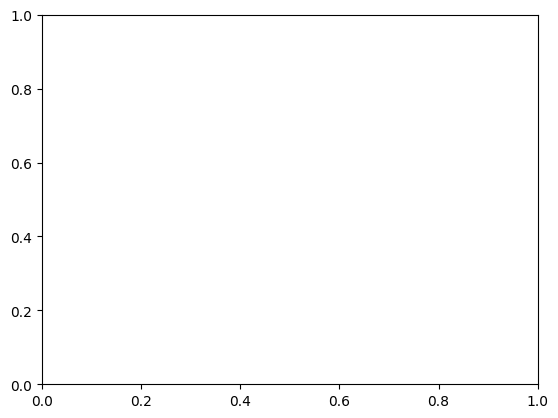

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df3['부가기호'], df3['도서권수'])
plt.xlabel('부가기호')
plt.ylabel('도서권수')
plt.show()

import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()



---



---



---



# 서울시 대기오염 측정정보
http://data.seoul.go.kr/dataList/OA-15526/S/1/datasetView.do</font>

In [98]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
air_hour_2021 = pd.read_csv('AIR_HOUR_2021.csv')
air_hour_2021

,측정일시,측정소 코드,측정항목,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분
0,2021010100,101,1,0.002,0,0,0
1,2021010100,101,3,0.016,0,0,0
2,2021010100,101,5,0.500,0,0,0
3,2021010100,101,6,0.022,0,0,0
4,2021010100,101,8,24.000,0,0,0
...,...,...,...,...,...,...,...
1313995,2021123123,125,3,0.020,0,0,0
1313996,2021123123,125,5,0.400,0,0,0
1313997,2021123123,125,6,0.020,0,0,0
1313998,2021123123,125,8,22.000,0,0,0


In [114]:
air_hour_2022 = pd.read_csv('AIR_HOUR_2022.csv')
air_hour_2022

,측정일시,측정소 코드,측정항목,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분
0,2022010100,101,1,0.003,0,0,0
1,2022010100,101,3,0.016,0,0,0
2,2022010100,101,5,0.400,0,0,0
3,2022010100,101,6,0.026,0,0,0
4,2022010100,101,8,23.000,0,0,0
...,...,...,...,...,...,...,...
1313995,2022123123,125,3,0.054,0,0,0
1313996,2022123123,125,5,1.100,0,0,0
1313997,2022123123,125,6,0.002,0,0,0
1313998,2022123123,125,8,71.000,0,0,0


In [126]:
air_hour_2021.columns = ['data_dt', 'loc_code', 'item_code',
                'data_value', 'data_state', 'data_nover', 'data_rover']
air_hour_2021

,data_dt,loc_code,item_code,data_value,data_state,data_nover,data_rover
0,2021010100,101,1,0.002,0,0,0
1,2021010100,101,3,0.016,0,0,0
2,2021010100,101,5,0.500,0,0,0
3,2021010100,101,6,0.022,0,0,0
4,2021010100,101,8,24.000,0,0,0
...,...,...,...,...,...,...,...
1313995,2021123123,125,3,0.020,0,0,0
1313996,2021123123,125,5,0.400,0,0,0
1313997,2021123123,125,6,0.020,0,0,0
1313998,2021123123,125,8,22.000,0,0,0


In [116]:
air_hour_2022.columns = ['data_dt', 'loc_code', 'item_code',
                'data_value', 'data_state', 'data_nover', 'data_rover']
air_hour_2022

,data_dt,loc_code,item_code,data_value,data_state,data_nover,data_rover
0,2022010100,101,1,0.003,0,0,0
1,2022010100,101,3,0.016,0,0,0
2,2022010100,101,5,0.400,0,0,0
3,2022010100,101,6,0.026,0,0,0
4,2022010100,101,8,23.000,0,0,0
...,...,...,...,...,...,...,...
1313995,2022123123,125,3,0.054,0,0,0
1313996,2022123123,125,5,1.100,0,0,0
1313997,2022123123,125,6,0.002,0,0,0
1313998,2022123123,125,8,71.000,0,0,0


In [117]:
df_1 = pd.concat([air_hour_2021, air_hour_2022], keys=[2021,2022])
print(df_1)

                 data_dt  loc_code  item_code  data_value  data_state  \
2021 0        2021010100       101          1       0.002           0   
     1        2021010100       101          3       0.016           0   
     2        2021010100       101          5       0.500           0   
     3        2021010100       101          6       0.022           0   
     4        2021010100       101          8      24.000           0   
...                  ...       ...        ...         ...         ...   
2022 1313995  2022123123       125          3       0.054           0   
     1313996  2022123123       125          5       1.100           0   
     1313997  2022123123       125          6       0.002           0   
     1313998  2022123123       125          8      71.000           0   
     1313999  2022123123       125          9      57.000           0   

              data_nover  data_rover  
2021 0                 0           0  
     1                 0           0  
     2

In [118]:
air_2021 = pd.read_csv('AIR_HOUR_2021.csv')
air_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314000 entries, 0 to 1313999
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   측정일시         1314000 non-null  int64  
 1   측정소 코드       1314000 non-null  int64  
 2   측정항목         1314000 non-null  int64  
 3   평균값          1314000 non-null  float64
 4   측정기 상태       1314000 non-null  int64  
 5   국가 기준초과 구분   1314000 non-null  int64  
 6   지자체 기준초과 구분  1314000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 70.2 MB


In [120]:
air_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
측정일시,1314000.0,2.021067e+09,34500.202367,2.021010e+09,2.021040e+09,2.021070e+09,2.021100e+09,2.021123e+09
측정소 코드,1314000.0,1.130000e+02,7.211105,1.010000e+02,1.070000e+02,1.130000e+02,1.190000e+02,1.250000e+02
측정항목,1314000.0,5.333333e+00,2.748738,1.000000e+00,3.000000e+00,5.500000e+00,8.000000e+00,9.000000e+00
평균값,1314000.0,-1.276289e+01,479.410734,-9.999000e+03,1.200000e-02,8.600000e-02,1.200000e+01,2.377670e+04
측정기 상태,1314000.0,1.042040e-01,0.908895,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
국가 기준초과 구분,1314000.0,2.721842e-02,0.162719,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
지자체 기준초과 구분,1314000.0,2.725114e-02,0.162814,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [123]:
air_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314000 entries, 0 to 1313999
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   측정일시         1314000 non-null  int64  
 1   측정소 코드       1314000 non-null  int64  
 2   측정항목         1314000 non-null  int64  
 3   평균값          1314000 non-null  float64
 4   측정기 상태       1314000 non-null  int64  
 5   국가 기준초과 구분   1314000 non-null  int64  
 6   지자체 기준초과 구분  1314000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 70.2 MB


In [124]:
air_2021.head()

,측정일시,측정소 코드,측정항목,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분
0,2021010100,101,1,0.002,0,0,0
1,2021010100,101,3,0.016,0,0,0
2,2021010100,101,5,0.500,0,0,0
3,2021010100,101,6,0.022,0,0,0
4,2021010100,101,8,24.000,0,0,0


In [128]:
(air_2021.groupby('data_dt').agg({'data_value':'mean'}))

KeyError: ignored